In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
# Get first 10000 rows and print some info about columns
train = pd.read_csv("../input/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=10000)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id

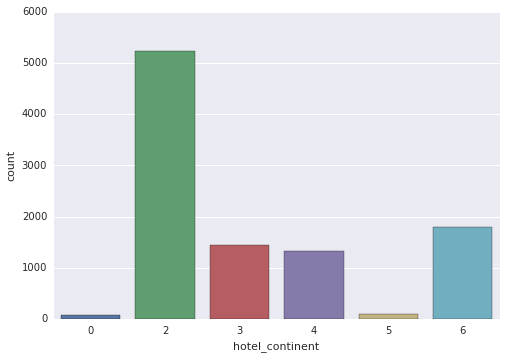

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(x='hotel_continent', data=train)

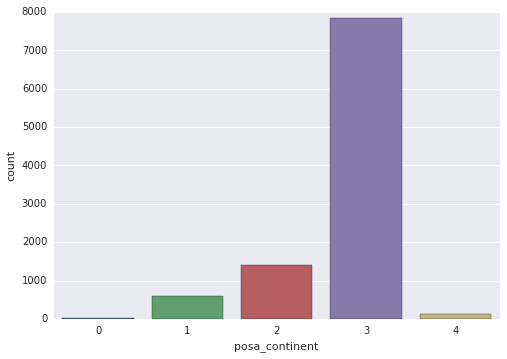

In [4]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(x='posa_continent', data=train)

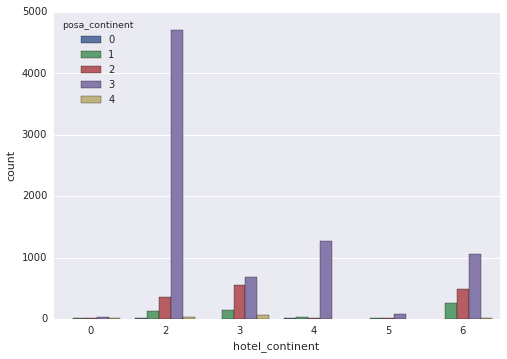

In [5]:
# putting the two above together
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

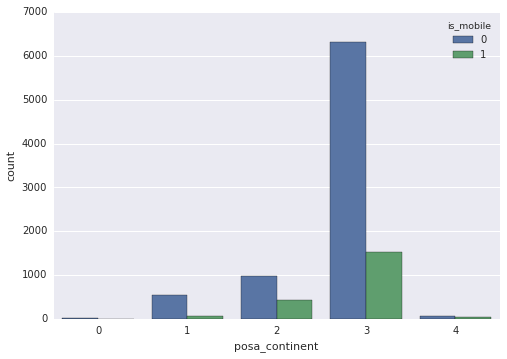

In [6]:
# how many people by continent are booking from mobile
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

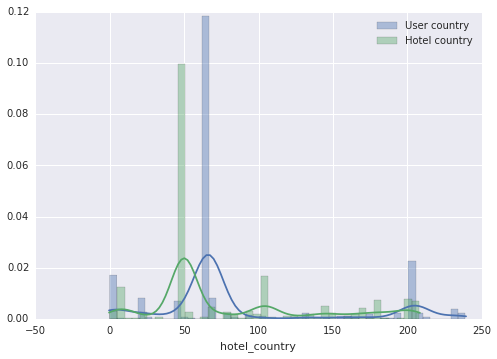

In [7]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

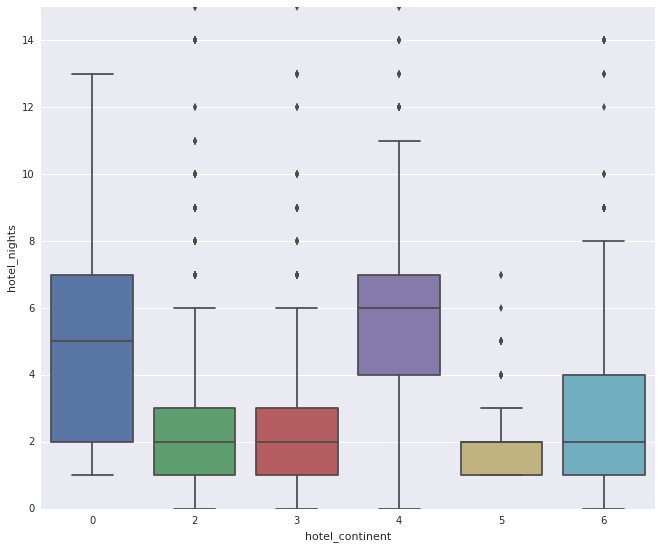

In [8]:
import numpy as np
# get number of booked nights as difference between check in and check out
hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

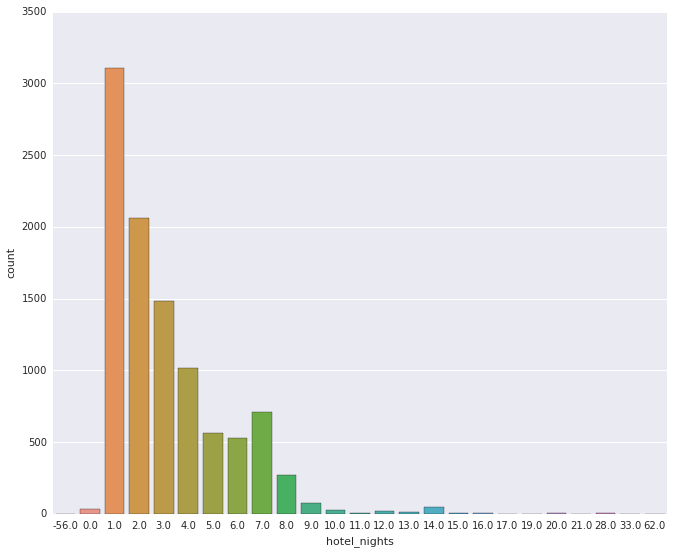

In [9]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


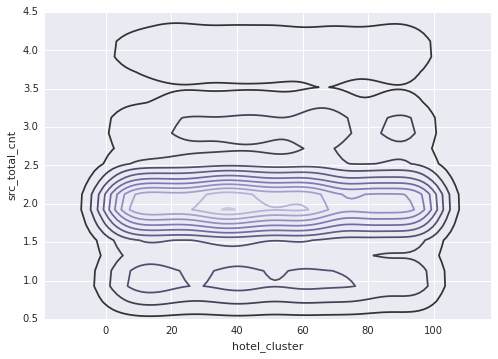

In [10]:
# distribution of the total number of people per cluster
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
ax = sns.kdeplot(train['hotel_cluster'], train['src_total_cnt'], cmap="Purples_d")
lim = ax.set(ylim=(0.5, 4.5))

In [24]:
train.groupby("src_total_cnt").max()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights
src_total_cnt,,,,,,,,,,,,,,,,,,,,,
0,2014-09-15 17:49:37,34,3,205,354,42328,1047.0188,48650,0,1,...,1,45120,1,1,4,3,198,1490,48,2.0
1,2014-12-31 19:27:19,44,4,239,848,56143,8716.5229,54404,1,1,...,8,61990,8,1,20,6,208,2086,99,28.0
2,2014-12-31 22:57:00,47,4,239,1003,56451,11301.8714,54404,1,1,...,5,65035,8,1,15,6,208,2103,99,62.0
3,2014-12-30 22:24:05,47,4,239,1003,56451,10221.6198,54404,1,1,...,3,64627,8,1,23,6,208,2027,99,16.0
4,2014-12-31 12:26:21,44,3,239,923,56451,9208.3558,54163,1,1,...,5,61531,6,1,9,6,208,1958,99,20.0
5,2014-12-31 15:29:13,37,3,239,848,53632,9946.7556,53057,1,1,...,5,51559,6,1,5,6,208,1851,98,7.0
6,2014-12-30 22:42:32,44,3,239,646,55121,6781.6023,53306,1,1,...,3,60738,6,1,5,6,208,1639,98,28.0
7,2014-12-12 05:30:52,37,3,239,923,52284,2088.0897,51167,1,1,...,7,45326,6,1,4,6,204,1776,99,7.0
8,2014-10-07 19:33:25,25,3,205,403,50364,1028.1743,44526,0,0,...,8,50689,6,1,4,6,204,1545,98,11.0


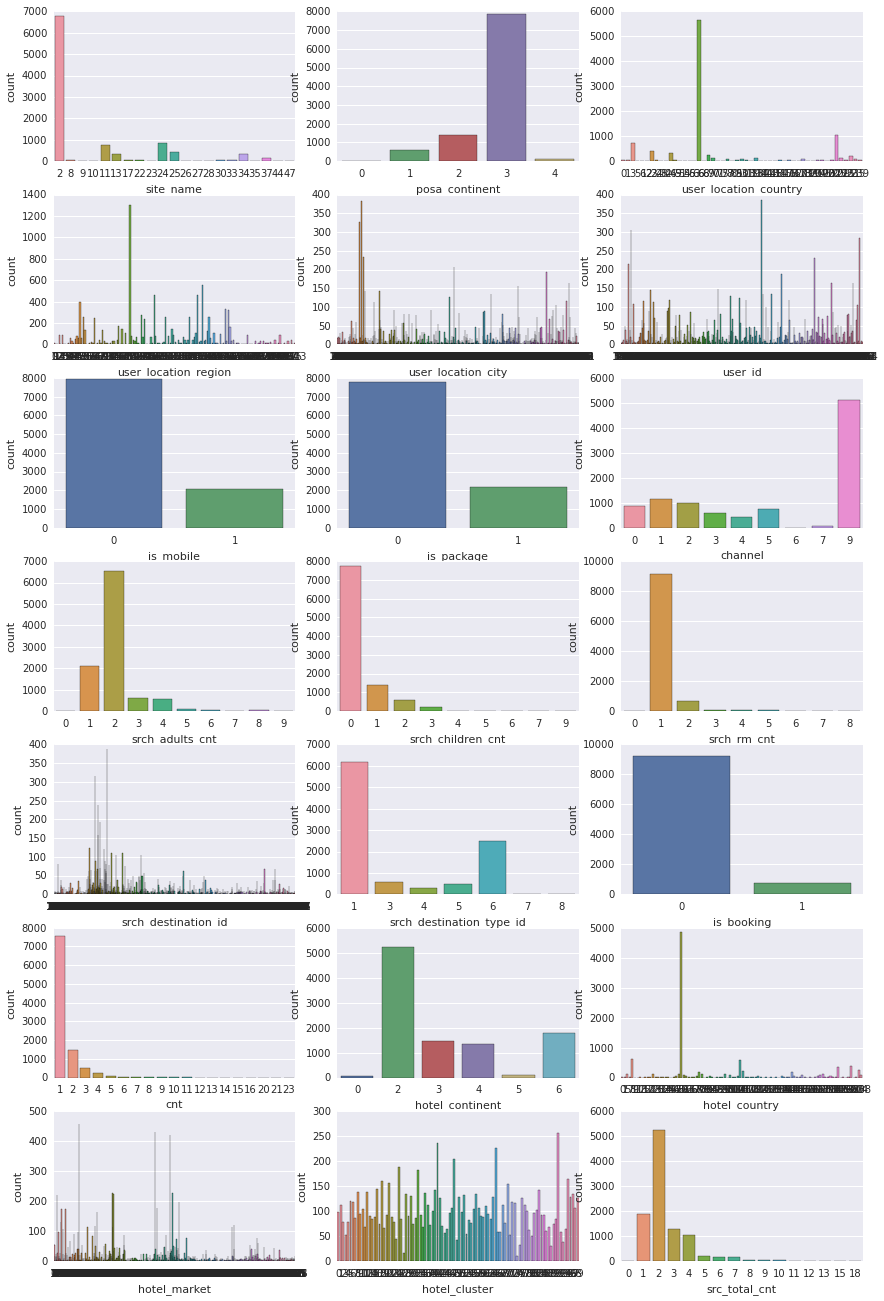

In [12]:
# plot all columns countplots
import numpy as np
rows = train.columns.size//3 - 1
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(12,18))
fig.tight_layout()
i = 0
j = 0
for col in train.columns:
    if j >= 3:
        j = 0
        i += 1
    # avoid to plot by date    
    if train[col].dtype == np.int64:
        sns.countplot(x=col, data=train, ax=axes[i][j])
        j += 1